In [1]:
from helper_functions import *
config ={'ev_data_sample': 'data/ev_data_sample.pkl',  # Sample EV data
         'results_time_analysis_sample': 'data/time_analysis_multitimestep_sample.pkl', # Path to save the results of the time analysis
         'results_time_analysis': 'data/time_comparison_multi_ts.pkl', #Path of the actual time analysis results used in the paper
        'polytope_matrix': 'matlab_functions/polytope_matrix.mat'}# Path to save the polytope matrix

# Performing Visual check fof feasibility

## Calculating UL vectors for individual EVs
Here we calculate the $\vec{u_k}$ and $\vec{l_k}$ vectors for a given EV parametrised by $\bar{p}, \underline{p}, \bar{e}, \underline{e}$ for $k\in \mathcal{T}$.
The $\vec{u}$ and $\vec{l}$ are calculated using **Theorem 7**:
$\begin{aligned}
    &u_k^{EV}=\min\left[k\overline{p}\Delta\text{t},\overline{e}-(T-k)\underline{p}\Delta\text{t}\right], &&\: k\in \mathcal{T} \\
    &l_k^{EV}=\max\left[k\underline{p}\Delta\text{t},\underline{e}-(T-k)\overline{p}\Delta\text{t}\right], &&\: k\in \mathcal{T} 
\end{aligned}$

In [2]:
t_steps = 3
u1,l1 = calculate_u_l(p_max=20, p_min=0, e_min = 15, e_max=25, del_t=1, t_steps=3)
u2, l2 = calculate_u_l(p_max=10, p_min=5, e_min = 20, e_max=30, del_t=1, t_steps=3)
print(f'The U vector for EV#1 is: {u1}\n The L vector for EV#1 is: {l1}')
print(f'The U vector for EV#2 is: {u2}\n The L vector for EV#2 is: {l2}')

The U vector for EV#1 is: [0, 20, 25, 25]
 The L vector for EV#1 is: [0, 0, 0, 15]
The U vector for EV#2 is: [0, 10, 20, 30]
 The L vector for EV#2 is: [0, 5, 10, 20]


## Calculating the individual Polytope
From the individual $\vec{u}$ and $\vec{l}$ parameters of single EV, the **H-representation** of the polytope can be computed using **Definition 2**:

$
\begin{aligned}
   \mathcal{P}^{EV} :=\left\{ \vec{p} \in \mathbb{R}^T \Bigg| \begin{bmatrix}
       \:\:\: \mathbb{I}\\
        -\mathbb{I}\\
        \:\:\: (1)^\top\Delta \text{t}\\
        - (1)^\top\Delta \text{t}
    \end{bmatrix}\vec{p} \preceq \begin{bmatrix}
        \:\:\:(1)\overline{p}\\
        -(1)\underline{p}\\
        \:\:\:(1)\overline{e}\\
        -(1)\underline{e}
    \end{bmatrix}  \right\},
\end{aligned}$
where $(1)$ is a column vector of length $T$ with elements equal to 1.


In [3]:
T = 3
# Vector A
A = generate_combinations_matrix(T)
# print side by side
print(f'The matrix A for T = {T} is:')
print(np.matrix(A)) 

b = generate_polytope_b_matrix(T)
print(f'The matrix b for T = {T} is:')
print(np.matrix(b))

A_poly = np.vstack([A, -A])
b_poly1 = np.vstack([np.matmul(b,np.array(u1[1:])).reshape((len(b),1)),-np.matmul(b,np.array(l1[1:])).reshape((len(b),1))])
b_poly2 = np.vstack([np.matmul(b,np.array(u2[1:])).reshape((len(b),1)),-np.matmul(b,np.array(l2[1:])).reshape((len(b),1))])

print(f'The matrix A_poly for T = {T} is:')
print(np.matrix(A_poly))
print(f'The matrix b_poly of Polytope 1 for T = {T} is:')
print(np.matrix(b_poly1))
print('##################')
print(f'The matrix b_poly of Polytope 2 for T = {T} is:')
print(np.matrix(b_poly2))


The matrix A for T = 3 is:
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 1 0]
 [1 0 1]
 [0 1 1]
 [1 1 1]]
The matrix b for T = 3 is:
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]
The matrix A_poly for T = 3 is:
[[ 1  0  0]
 [ 0  1  0]
 [ 0  0  1]
 [ 1  1  0]
 [ 1  0  1]
 [ 0  1  1]
 [ 1  1  1]
 [-1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]
 [-1 -1  0]
 [-1  0 -1]
 [ 0 -1 -1]
 [-1 -1 -1]]
The matrix b_poly of Polytope 1 for T = 3 is:
[[ 20]
 [ 20]
 [ 20]
 [ 25]
 [ 25]
 [ 25]
 [ 25]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [-15]]
##################
The matrix b_poly of Polytope 2 for T = 3 is:
[[ 10]
 [ 10]
 [ 10]
 [ 20]
 [ 20]
 [ 20]
 [ 30]
 [ -5]
 [ -5]
 [ -5]
 [-10]
 [-10]
 [-10]
 [-20]]


## Calculating the feasible signal

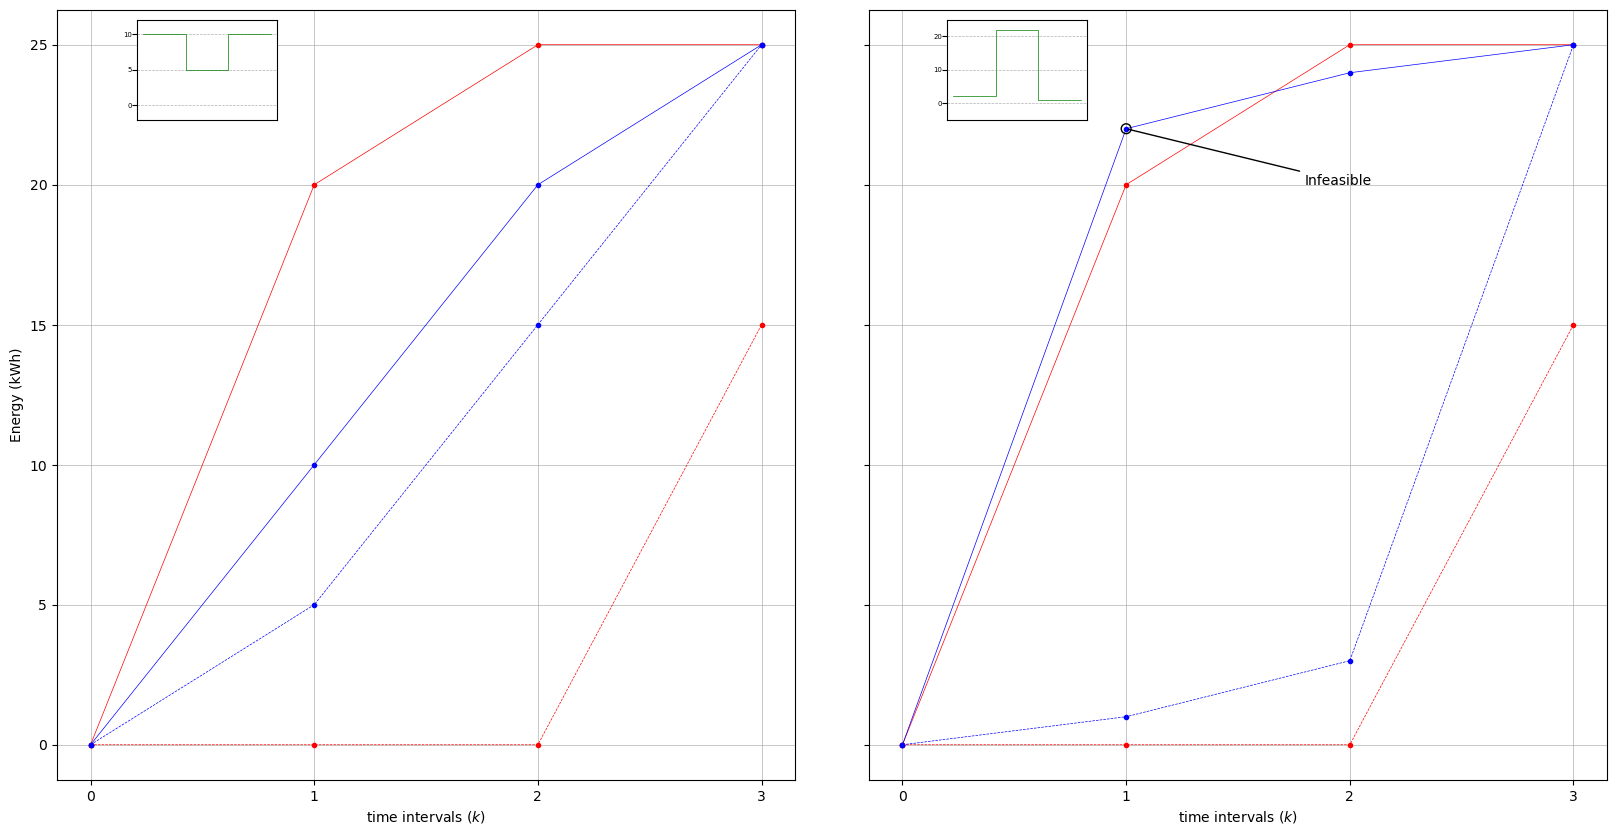

In [4]:
u, l = calculate_u_l(p_max=20, p_min=0, e_min = 15, e_max=25, del_t=1, t_steps=3)
p_feasible = [10,5,10]
p_infeasible = [2,22,1]
plot_feasibility_test(u,l,p_feasible,p_infeasible,save_path='figures/graphical_test.png')

# Plotting of 3-Polytope for 2 EV and theirn Minkwoski summation

In [5]:

###################### UL vectors for individual EVs ##################################

print('######################## UL vectors for individual EVs ########################')
t_steps = 3
u1,l1 = calculate_u_l(p_max=20, p_min=0, e_min = 15, e_max=25, del_t=1, t_steps=3)
u2, l2 = calculate_u_l(p_max=10, p_min=5, e_min = 20, e_max=30, del_t=1, t_steps=3)
print(f'The U vector for EV#1 is: {u1}\n The L vector for EV#1 is: {l1}')
print(f'The U vector for EV#2 is: {u2}\n The L vector for EV#2 is: {l2}')

#%% [markdown]

################################ Polytope representation #############################

print('######################## Polytope representation ########################')
T = 3
# Vector A
A = generate_combinations_matrix(T)
# print side by side
print(f'The matrix A for T = {T} is:')
print(np.matrix(A))

b = generate_polytope_b_matrix(T)
print(f'The matrix b for T = {T} is:')
print(np.matrix(b))

A_poly = np.vstack([A, -A])
b_poly1 = np.vstack([np.matmul(b,np.array(u1[1:])).reshape((len(b),1)),-np.matmul(b,np.array(l1[1:])).reshape((len(b),1))])
b_poly2 = np.vstack([np.matmul(b,np.array(u2[1:])).reshape((len(b),1)),-np.matmul(b,np.array(l2[1:])).reshape((len(b),1))])

print(f'The matrix A_poly for T = {T} is:')
print(np.matrix(A_poly))
print(f'The matrix b_poly of Polytope 1 for T = {T} is:')
print(np.matrix(b_poly1))
print('##################')
print(f'The matrix b_poly of Polytope 2 for T = {T} is:')
print(np.matrix(b_poly2))

# Saving A, B as  .mat file for plotting
savemat(config['polytope_matrix'], {'A':A_poly, 'B1':b_poly1, 'B2':b_poly2})
print(f'System matrix saved at {config["polytope_matrix"]}')
#%%


######################## UL vectors for individual EVs ########################
The U vector for EV#1 is: [0, 20, 25, 25]
 The L vector for EV#1 is: [0, 0, 0, 15]
The U vector for EV#2 is: [0, 10, 20, 30]
 The L vector for EV#2 is: [0, 5, 10, 20]
######################## Polytope representation ########################
The matrix A for T = 3 is:
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 1 0]
 [1 0 1]
 [0 1 1]
 [1 1 1]]
The matrix b for T = 3 is:
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]
The matrix A_poly for T = 3 is:
[[ 1  0  0]
 [ 0  1  0]
 [ 0  0  1]
 [ 1  1  0]
 [ 1  0  1]
 [ 0  1  1]
 [ 1  1  1]
 [-1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]
 [-1 -1  0]
 [-1  0 -1]
 [ 0 -1 -1]
 [-1 -1 -1]]
The matrix b_poly of Polytope 1 for T = 3 is:
[[ 20]
 [ 20]
 [ 20]
 [ 25]
 [ 25]
 [ 25]
 [ 25]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [-15]]
##################
The matrix b_poly of Polytope 2 for T = 3 is:
[[ 10]
 [ 10]
 [ 10]
 [ 20]
 [ 20]
 [ 20]
 [ 30]
 [ -5]
 [ -5]
 [ -5]
 [-10]
 [-10]
 [

# Visualization of Computational time and Memory performance

## Generating dummy EV transactions
The following code only runs witha dataframe as input which has the following columns and type:
* 'START': This is the arival time of the EV. (pd.DatetimeIndex, UTC)
* 'STOP': This is the depature time of the EV. (pd.DatetimeIndex, UTC)
* 'P_MAX': This the maximum chargingpower allowed for the concened EV (kWh). (Float)
* 'VOL': This is the energy charged in the session (kWh). (Float)

In [6]:
sample_data = generate_dummy_transactions(number_of_days = 100, start_date = dt.datetime(year=2022, month=1, day=1))
sample_data.to_pickle(config['ev_data_sample'])

Generating transactions:   0%|          | 0/100 [00:00<?, ?it/s]

## Running models for computimng performance

In [7]:
re_run = True # Set to True to re-run the analysis
TIME_STEPS_LIST = [1,1/2]
if re_run:
    ev_data_all = pd.read_pickle(config['ev_data_sample']) # load the sample data
    date_sample = dt.datetime(2022, 1, 1) # Date from which the data is started taken
    verbose_ = 100 # Set to 0 for no print statements
    f_windw = [18,19] # in hours
    n_days = [1,50] # Number of days to simulate
    re_list = [] # results list
    for n_times in tq.tqdm(n_days, position=0,leave=True,desc='Days of transactions'):
        data_for_opt = multiply_transactions(ev_data_all, n_times,date_sample,del_t=1, f_windw=f_windw, verbose_=verbose_ , restrict_stop_time=False, total_time_steps=36)
        for ts in tq.tqdm(TIME_STEPS_LIST, position=0,leave=True, desc='Time step size'):
            res_dict = single_run(data_for_opt, f_windw, del_t=ts, verbose_=verbose_)
            re_list.append(res_dict)

    time_analysis_df = pd.DataFrame(re_list)
    time_analysis_df.to_pickle(config['results_time_analysis_sample']) # Save the results

Days of transactions:   0%|          | 0/2 [00:00<?, ?it/s]

There are a total of 83.0 time steps of 1 hours each in the optimization horizon


Time step size:   0%|          | 0/2 [00:00<?, ?it/s]

    model.name="unknown";
      - termination condition: infeasibleOrUnbounded
      - message from solver: Problem proven to be infeasible or unbounded.
Build time for direct method: 0.10072207450866699 seconds
Solve time for direct method: 0.6368427276611328 seconds
Build time for ul method: 0.002518892288208008 seconds
Solve time for ul method: 0.07591891288757324 seconds
    model.name="unknown";
      - termination condition: infeasibleOrUnbounded
      - message from solver: Problem proven to be infeasible or unbounded.
Build time for direct method: 0.12048602104187012 seconds
Solve time for direct method: 0.2784140110015869 seconds
Build time for ul method: 0.0025238990783691406 seconds
Solve time for ul method: 0.07013916969299316 seconds
There are a total of 83.0 time steps of 1 hours each in the optimization horizon
There are a total of 75.0 time steps of 1 hours each in the optimization horizon
There are a total of 78.0 time steps of 1 hours each in the optimization horizon


Time step size:   0%|          | 0/2 [00:00<?, ?it/s]

    model.name="unknown";
      - termination condition: infeasibleOrUnbounded
      - message from solver: Problem proven to be infeasible or unbounded.
Build time for direct method: 3.68540096282959 seconds
Solve time for direct method: 5.8216493129730225 seconds
Build time for ul method: 0.0019750595092773438 seconds
Solve time for ul method: 0.07497882843017578 seconds
    model.name="unknown";
      - termination condition: infeasibleOrUnbounded
      - message from solver: Problem proven to be infeasible or unbounded.
Build time for direct method: 5.3123767375946045 seconds
Solve time for direct method: 9.08118724822998 seconds
Build time for ul method: 0.0026040077209472656 seconds
Solve time for ul method: 0.07688498497009277 seconds


## Plotting the graphs for computational time and memory

[0.06246685981750488, 0.06274080276489258] [0.0020258426666259766, 0.0019006729125976562]
[0.060727834701538086, 0.06502723693847656] [0.0023102760314941406, 0.0025022029876708984]
[] []
[] []


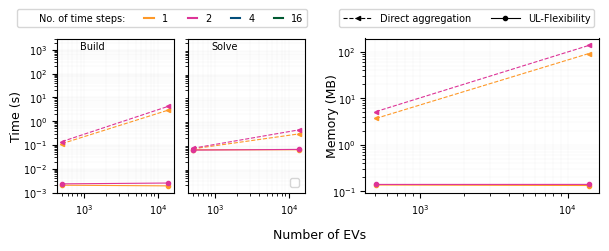

In [9]:

''' ######################### Plotting time analysis ############################# 
'''

PLOT_ACTUAL = False # Set to True to plot the actual data

if PLOT_ACTUAL:
    time_analysis_df1 = pd.read_pickle(config['results_time_analysis']) # Load the results for either sample or actual data
    save_path = 'figures/memory_time_analysis_multi_ts_actual.pdf' #
else:
    time_analysis_df1 = pd.read_pickle(config['results_time_analysis_sample']) # Load the results for either sample or actual data
    save_path = 'figures/memory_time_analysis_multi_ts_sample.pdf' #

cl_scheme = ['#fe9929','#dd3497','#034e7b','#005a32']

""" 
NOTE: Update this code according to the new results so that it is visualized properly
"""
# %%
update_fonts_for_fig(2)

fig = plt.figure(figsize=(7,2))
spec = gridspec.GridSpec(ncols=5, nrows=1, figure=fig,width_ratios=[1,-0.2,1,0.2,2])
ax00  = fig.add_subplot(spec[0, 0])
ax01  = fig.add_subplot(spec[0, 2])
ax03  = fig.add_subplot(spec[0, 4])


ax = [ax00,ax01,ax03]

n_t_steps = np.array([  1,  2, 4, 16])
i = 0
for n_t in n_t_steps:
    df = time_analysis_df1[time_analysis_df1['No of time steps'] == n_t]
    # t_solve_direct = [df.iloc[i]['Direct optimization']['info']['Solver'][0]['Time'] for i in range(len(df))]
    # t_solve_ul = [df.iloc[i]['UL optimization']['info']['Solver'][0]['Time'] for i in range(len(df))]

    t_built_direct = [df['Direct optimization'].iloc[i]['Build time (s)'] for i in range(len(df))]
    t_built_ul = [df['UL optimization'].iloc[i]['Build time (s)'] for i in range(len(df))]

    t_solve_direct = [df['Direct optimization'].iloc[i]['info']['Solver'][0]['Time'] for i in range(len(df))]
    t_solve_ul = [df['UL optimization'].iloc[i]['info']['Solver'][0]['Time']  for i in range(len(df))]

    print(t_solve_ul, t_built_ul)

    ax[0].plot(df['No of EVs'],t_built_direct,label=f'{n_t} time steps', linestyle='--', color=cl_scheme[i], linewidth=0.8, marker='<', markersize=3)
    ax[0].plot(df['No of EVs'],t_built_ul,label=f'{n_t} time steps', linestyle='-', color=cl_scheme[i], linewidth=0.8, marker='o', markersize=3)

    ax[1].plot(df['No of EVs'],t_solve_direct,label=f'{n_t} time steps', linestyle='--', color=cl_scheme[i], linewidth=0.8, marker='<', markersize=3)
    ax[1].plot(df['No of EVs'],t_solve_ul,label=f'{n_t} time steps', linestyle='-', color=cl_scheme[i], linewidth=0.8, marker='o', markersize=3)    

    
    
    i += 1
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[1].set_yticks([])

ax[0].set_ylim([1e-3,3e3])
ax[1].set_ylim([1e-3,3e3])
ax[0].set_ylabel('Time (s)', fontsize=9, labelpad=0)

ax[0].grid(True, which='both', axis='both', linewidth=0.05)
ax[1].grid(True, which='both', axis='both', linewidth=0.05)

ax[0].text(0.2, 0.95, 'Build', ha='left', va='center', transform=ax[0].transAxes, fontsize=7)
ax[1].text(0.2, 0.95, 'Solve', ha='left', va='center', transform=ax[1].transAxes, fontsize=7)
custom_line = []
ax[1].legend(custom_line, ['Baseline'], ncol=1,loc='lower right')


i = 0
for n_t in n_t_steps:
    df = time_analysis_df1[time_analysis_df1['No of time steps'] == n_t]
    memory_direc_mb = df['Memory used by direct method (bytes)']/1e6
    memory_ul_mb = df['Memory used by ul method (bytes)']/1e6
    ax[2].plot(df['No of EVs'],memory_direc_mb,label=f'{n_t} time steps', linestyle='--', color=cl_scheme[i], linewidth=0.8, marker='<', markersize=3)
    ax[2].plot(df['No of EVs'],memory_ul_mb,label=f'{n_t} time steps', linestyle='-', color=cl_scheme[i], linewidth=0.8, marker='o', markersize=3)
    i += 1
ax[2].set_yscale('log')
ax[2].set_xscale('log')
ax[2].set_ylabel('Memory (MB)', fontsize=9, labelpad=-5) # control the horizontal spacing

# ax[2].set_xlabel('Number of EVs (in thousands)',fontsize=9)
ax[2].grid(True, which='both', axis='both', linewidth=0.05)

custom_line = [plt.Line2D([0], [0],linestyle='--', color='w')]+[plt.Line2D([0], [0], color=cl_scheme[i], lw=1.5) for i in range(len(n_t_steps))] + [plt.Line2D([0], [0], linestyle='--', color='k')]
custom_line_type = [plt.Line2D([0], [2], linestyle='--', color='k', marker='<', markersize=3, linewidth=0.8), plt.Line2D([0], [2], linestyle='-', color='k', marker='o', markersize=3, linewidth=0.8)]
fig.legend(custom_line[0:-1], ['No. of time steps:','1','2','4','16'], ncol=5, loc='upper right', handlelength=1, bbox_to_anchor=(0.49, 1.05), fontsize=7)
fig.legend(custom_line_type, ['Direct aggregation','UL-Flexibility'], ncol=2, loc='upper right', handlelength=3, bbox_to_anchor=(0.9, 1.05), fontsize=7)
fig.text(0.5, -0.1, 'Number of EVs', ha='center', va='center', fontsize=9)
fig.savefig(save_path, dpi=600, bbox_inches='tight')
# %%
